# **Barplot with error bars**

### **geom_errorbar()**

> #### 1.  ฟังก์ชั่นนี้ต้องการ 3 arguments คือ ymin, ymax, x

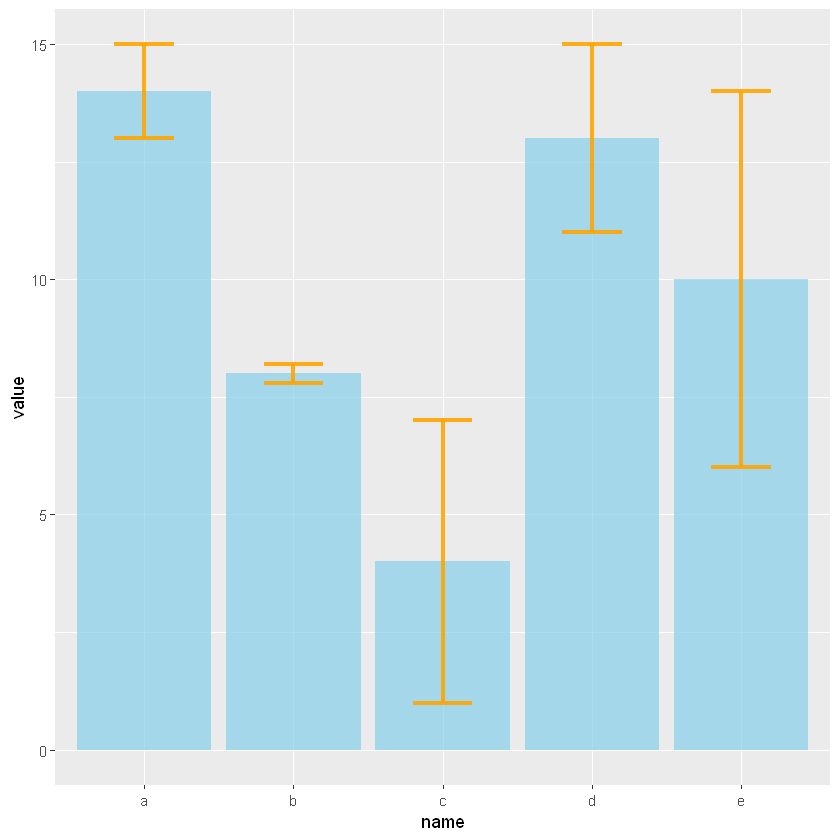

In [2]:
# Load ggplot2
library(ggplot2)

# create dummy data
data <- data.frame(
  name=letters[1:5],
  value=sample(seq(4,15),5),
  sd=c(1,0.2,3,2,4)
)
 
# Most basic error bar
ggplot(data) +
    geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.7) +
    geom_errorbar( aes(x=name, ymin=value-sd, ymax=value+sd), width=0.4, colour="orange", alpha=0.9, size=1.3)

### **การปรับแต่ง error bars**

> #### สามารถใช้ฟังก์ชั่นต่อไปนี้ **geom_crossbar(), geom_linerange() และ geom_pointrange()**

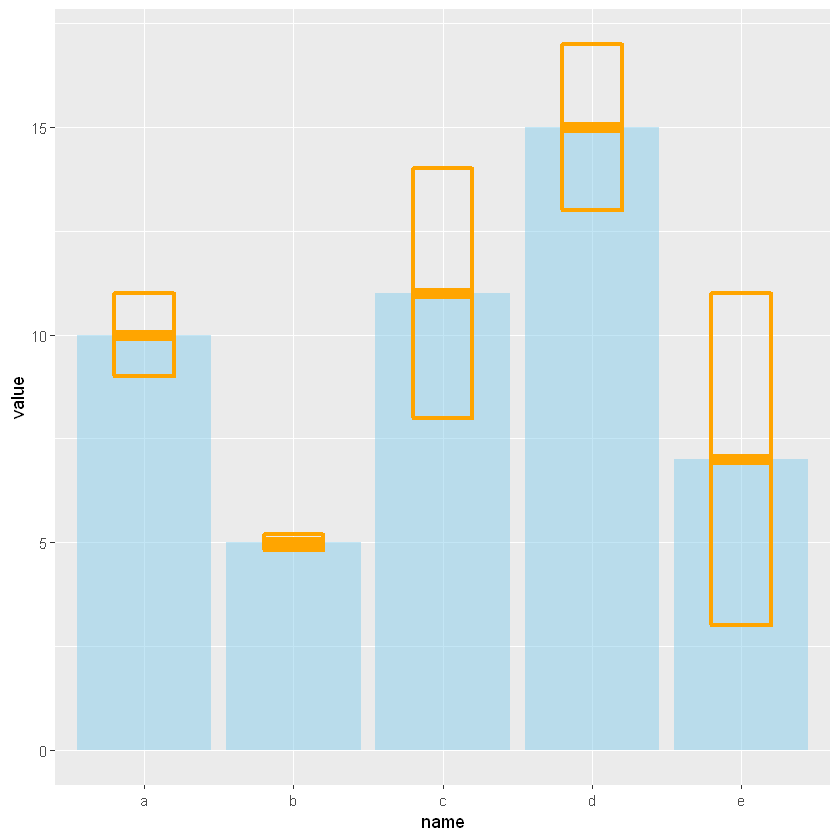

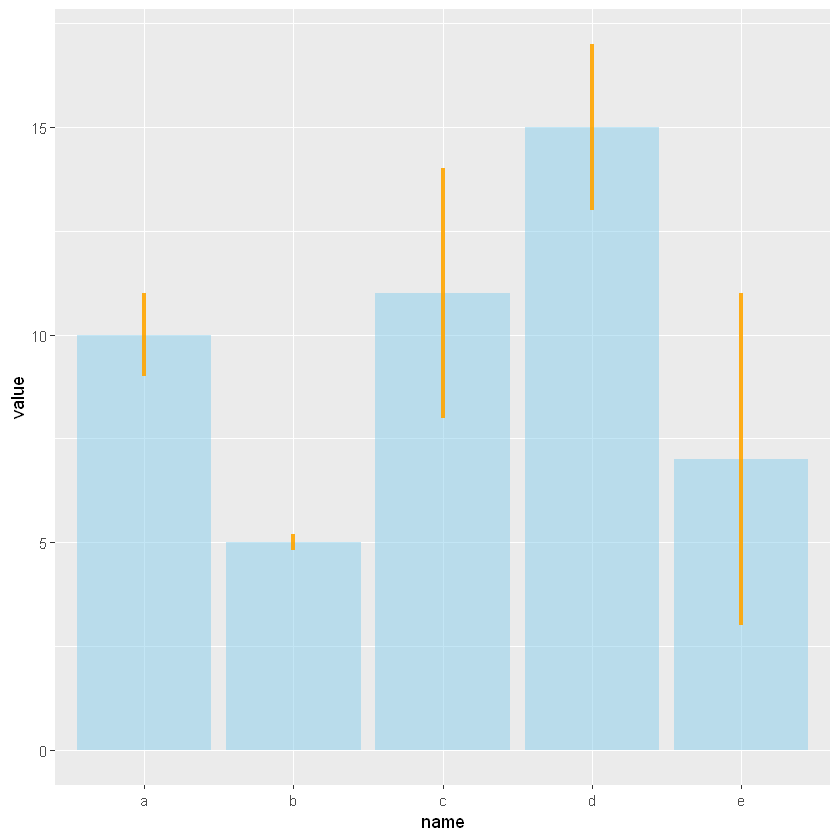

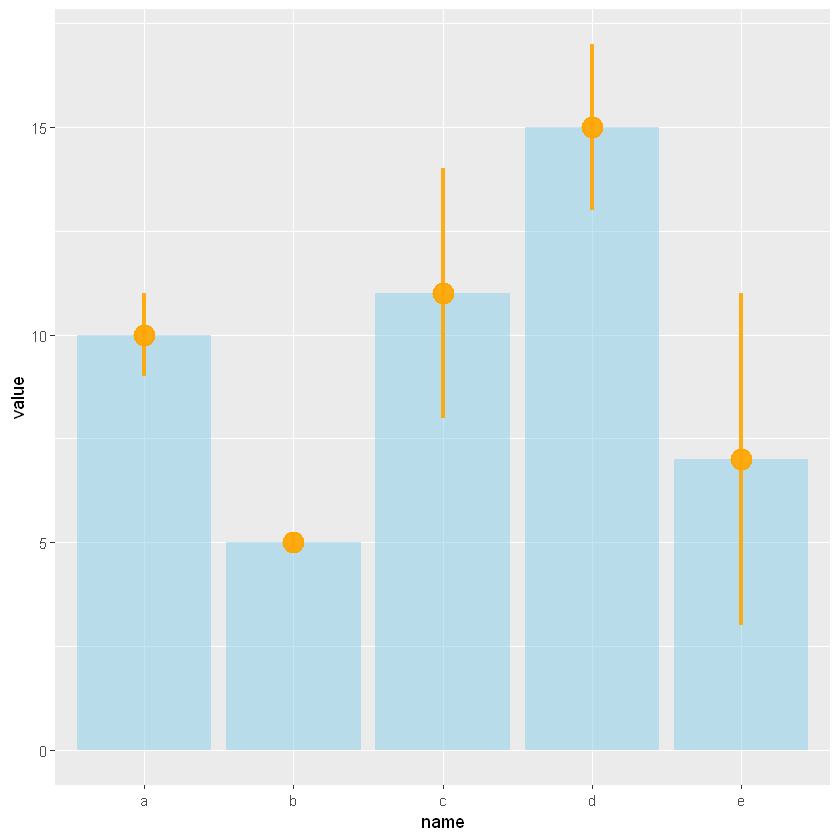

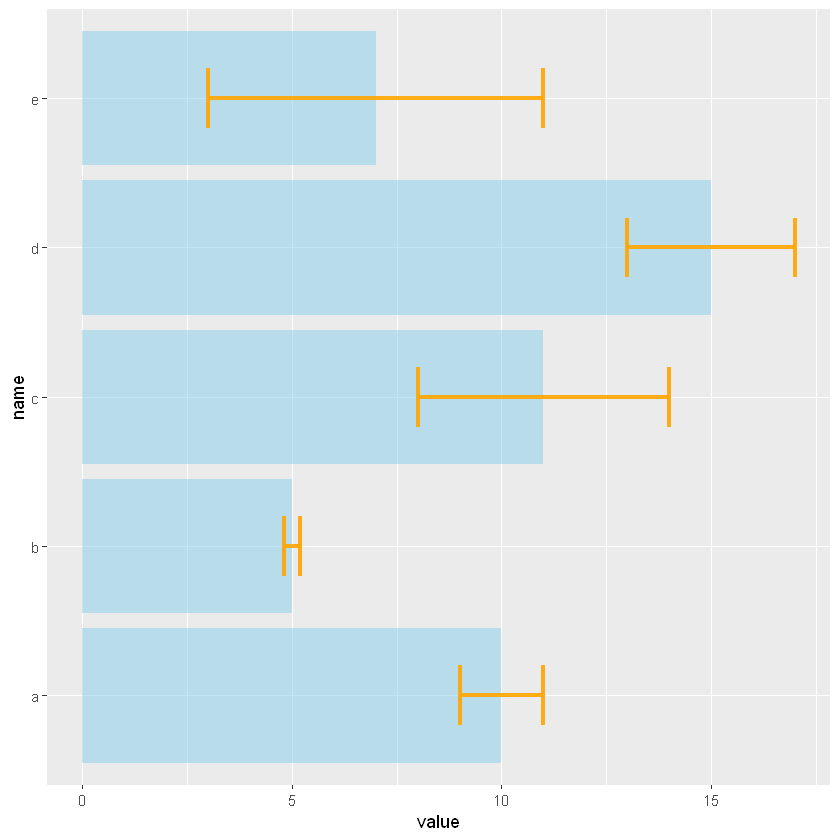

In [4]:
# Load ggplot2
library(ggplot2)

# create dummy data
data <- data.frame(
  name=letters[1:5],
  value=sample(seq(4,15),5),
  sd=c(1,0.2,3,2,4)
)

# rectangle
ggplot(data) +
  geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.5) +
  geom_crossbar( aes(x=name, y=value, ymin=value-sd, ymax=value+sd), width=0.4, colour="orange", alpha=0.9, size=1.3)
 
# line
ggplot(data) +
  geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.5) +
  geom_linerange( aes(x=name, ymin=value-sd, ymax=value+sd), colour="orange", alpha=0.9, size=1.3)

# line + dot
ggplot(data) +
  geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.5) +
  geom_pointrange( aes(x=name, y=value, ymin=value-sd, ymax=value+sd), colour="orange", alpha=0.9, size=1.3)
 
# horizontal
ggplot(data) +
  geom_bar( aes(x=name, y=value), stat="identity", fill="skyblue", alpha=0.5) +
  geom_errorbar( aes(x=name, ymin=value-sd, ymax=value+sd), width=0.4, colour="orange", alpha=0.9, size=1.3) +
  coord_flip()

### **Standard deviation, Standard error or Confidence Interval**

#### ตัวอย่าง

In [6]:
 vec = c(1,3,5,9,38,7,2,4,9,19,19)

#### **Standard Deviation (SD)**

In [7]:
sd <- sd(vec)
sd <- sqrt(var(vec))

#### **Standard Error (SE)**

In [8]:
se = sd(vec) / sqrt(length(vec))

#### **Confidence Interval (CI)**

In [12]:
alpha=0.05
t=qt((1-alpha)/2 + .5, length(vec)-1)   # tend to 1.96 if sample size is big enough
CI=t*se


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




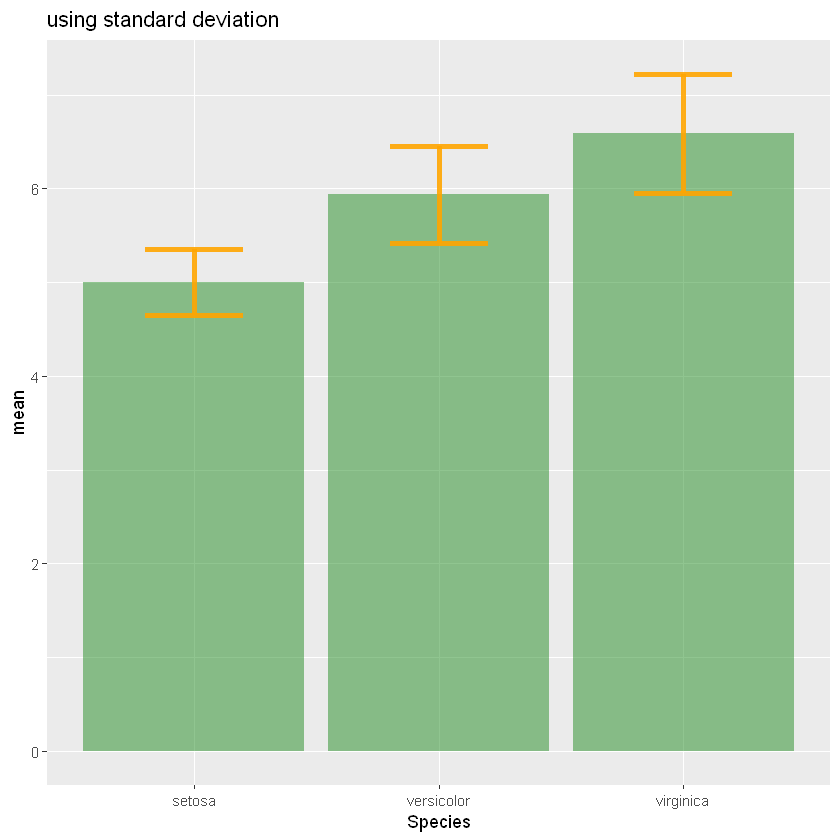

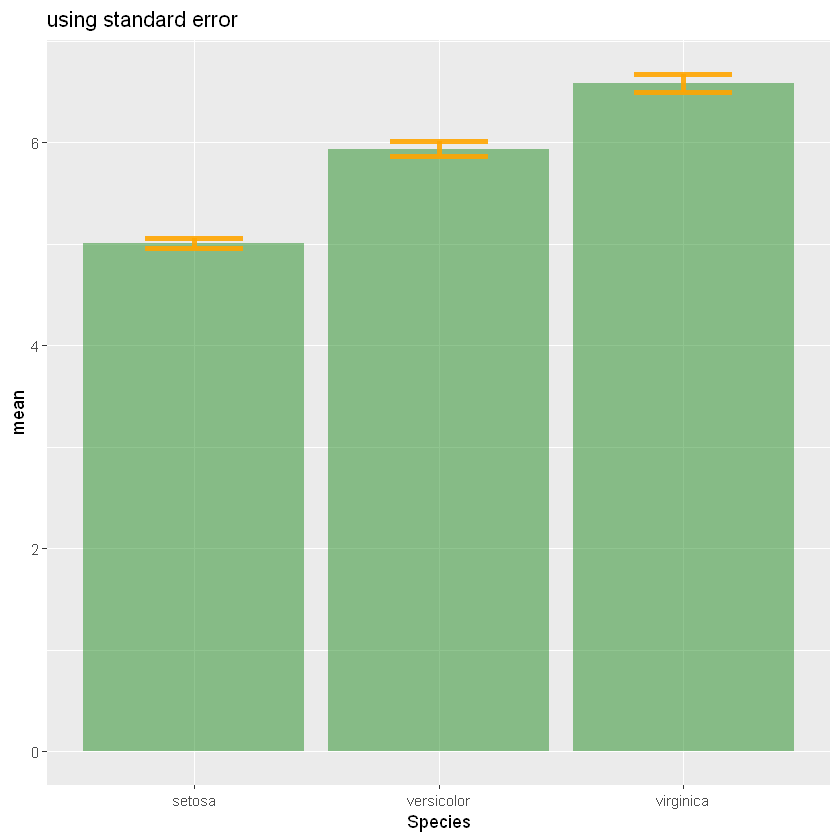

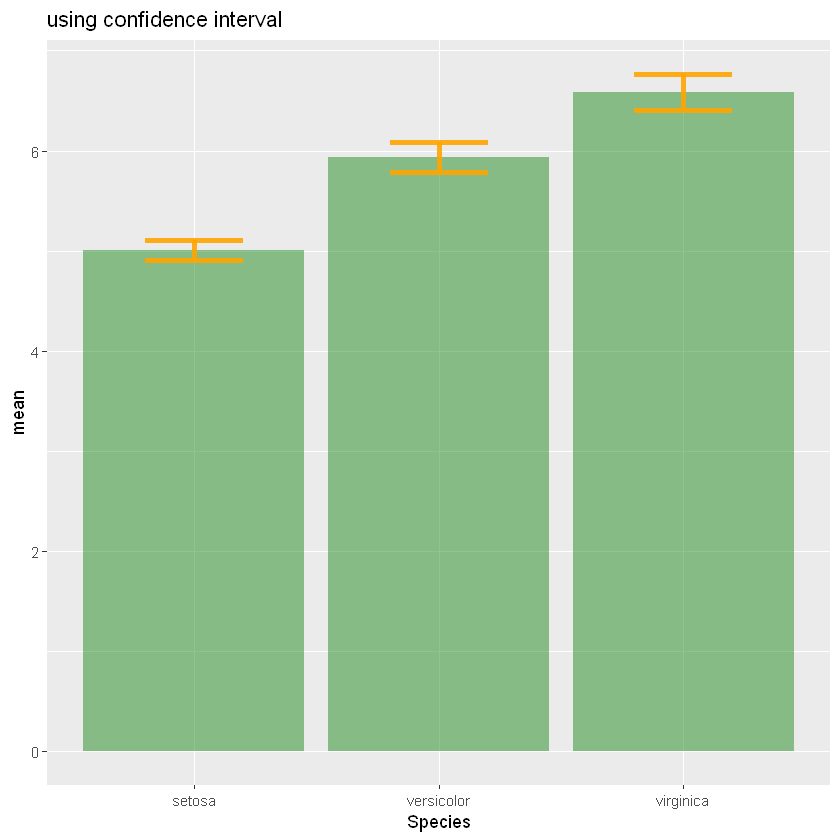

In [13]:
# Load ggplot2
library(ggplot2)
library(dplyr)

# Data
data <- iris %>% select(Species, Sepal.Length) 
 
# Calculates mean, sd, se and IC
my_sum <- data %>%
  group_by(Species) %>%
  summarise( 
    n=n(),
    mean=mean(Sepal.Length),
    sd=sd(Sepal.Length)
  ) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
 
# Standard deviation
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-sd, ymax=mean+sd), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard deviation")
 
# Standard Error
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-se, ymax=mean+se), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using standard error")
 
# Confidence Interval
ggplot(my_sum) +
  geom_bar( aes(x=Species, y=mean), stat="identity", fill="forestgreen", alpha=0.5) +
  geom_errorbar( aes(x=Species, ymin=mean-ic, ymax=mean+ic), width=0.4, colour="orange", alpha=0.9, size=1.5) +
  ggtitle("using confidence interval")